In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../src'))

from kamino.constants import *

import matplotlib.pyplot as plt
import numpy as np

In [2]:
generate_data = False

In [3]:
from kamino.speedy_climate.generator import generate_input_parameters, run_batch_simulation

if generate_data:

    inputs = generate_input_parameters(1000, 'G2', 0.25, 0.05)
    run_batch_simulation(inputs, 'helios_1000_runs_earth_rapid_rotator.csv')

    inputs = generate_input_parameters(1000, 'M5', 0.6666, 0.05)
    run_batch_simulation(inputs, 'helios_1000_runs_earth_tidally_locked.csv')

Training new emulator from: helios_3000_runs_earth_rapid_rotator.csv
Fitting Gaussian process...
Fitted Gaussian process
Learned kernel: 0.659**2 * RBF(length_scale=[0.589, 0.61, 1.68, 0.64])
Log-marginal-likelihood: 1868.202
Training R2: 0.9989
Validation R2: 0.9938
Saved emulator_diagnostics.png
Saving emulator to /home/pt426/Code/kamino/notebooks/../src/kamino/speedy_climate/data/emulators...


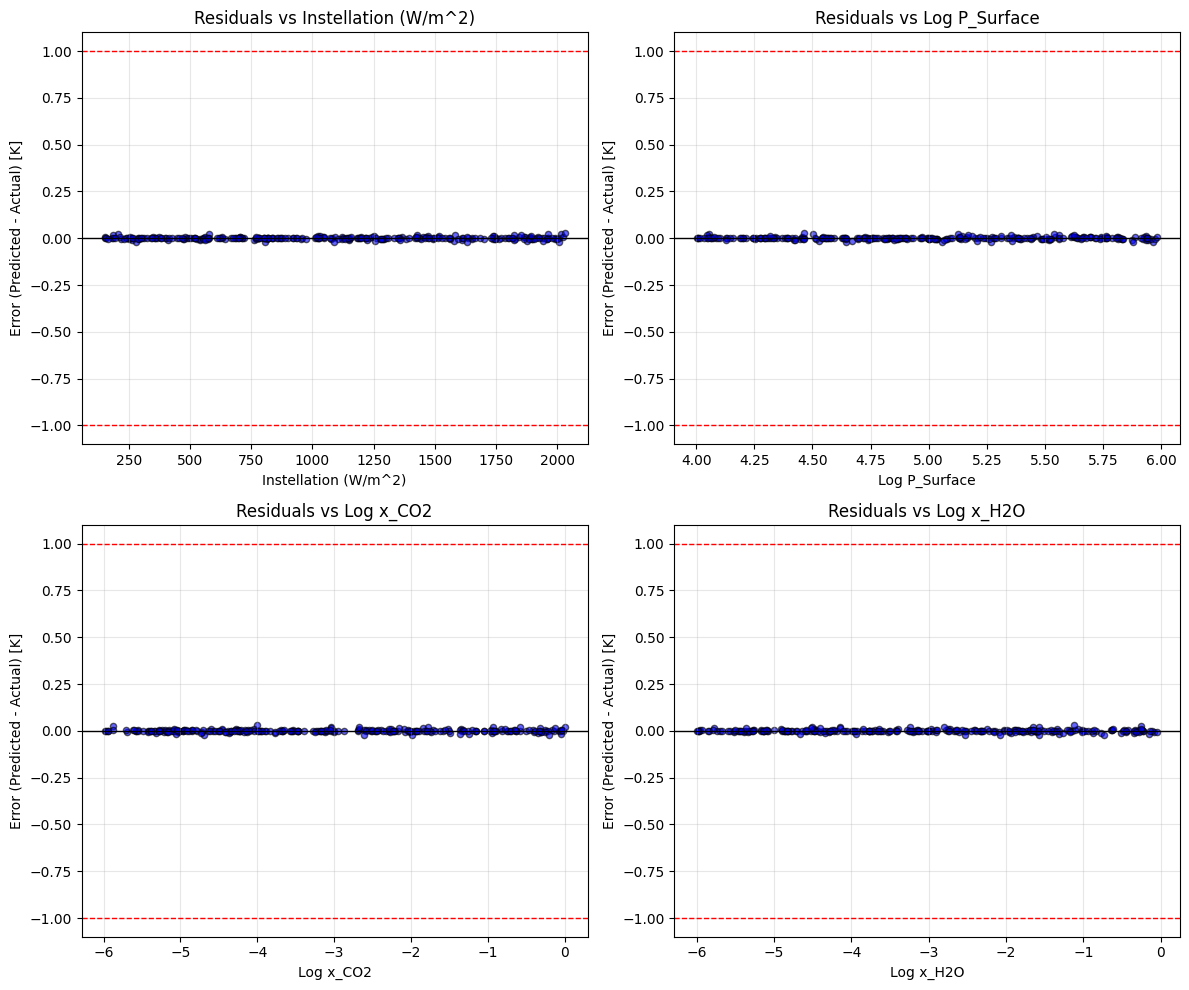

In [8]:
from kamino.speedy_climate.emulator import climate_emulator

cem = climate_emulator(
    "earth_rapid_rotator",
    "helios_3000_runs_earth_rapid_rotator.csv",
    make_accuracy_plot=True,
    force_retraining=True
    )

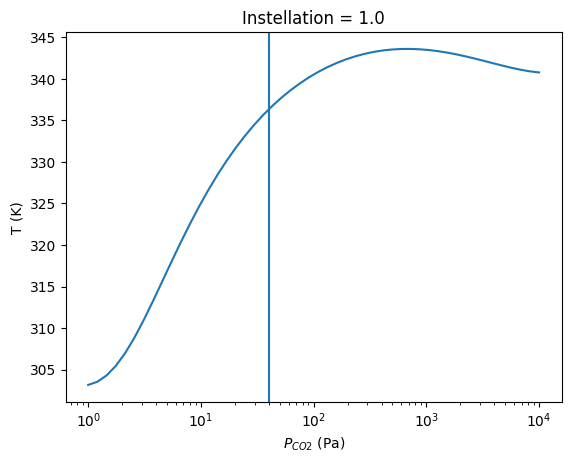

In [9]:
S = 1.0

cem.make_temperature_pco2_interpolator(S * SOLAR_CONSTANT, EARTH_ATM, T_start=280)

pco2 = np.logspace(0, 4)

T = cem.get_temperature_from_pco2(pco2)

plt.plot(pco2, T)
plt.xlabel('$P_{CO2}$ (Pa)')
plt.ylabel('T (K)')
plt.title(f'Instellation = {S}')
plt.xscale('log')
plt.axvline(40)

plt.show()